<a href="https://colab.research.google.com/github/James-Sutanto/LogisticStock/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 53.5 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf

In [56]:
data = yf.download('GLD',start= '2010-01-01', end = '2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [57]:
data = data.drop(['Open','High','Low','Volume'],axis=1)

In [58]:
data = data.drop('Adj Close', axis=1)

In [104]:
lags = 4
cols = []
data['return'] = np.log(data['Close']/data['Close'].shift(1))
data.dropna(inplace=True)
for i in range(1,lags+1):
  col = 'lag{}'.format(i)
  data[col] = data['return'].shift(i)
  cols.append(col)
data.dropna(inplace= True)


In [105]:
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(C=1e7, solver='lbfgs',multi_class='auto', max_iter=1000)
lm.fit(data[cols],np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [106]:
data['prediction'] = lm.predict(data[cols])
data['prediction'].value_counts()

 1.0    2593
-1.0     213
Name: prediction, dtype: int64

In [107]:
hits = np.sign(data['return'].iloc[lags:] * data['prediction'].iloc[lags:]).value_counts()

In [108]:
accuracy_score(data['prediction'], np.sign(data['return']))

0.5238774055595153

In [109]:
data['strategy'] = data['prediction']*data['return']
data[['return','strategy']].sum().apply(np.exp)

return      1.245051
strategy    1.278501
dtype: float64

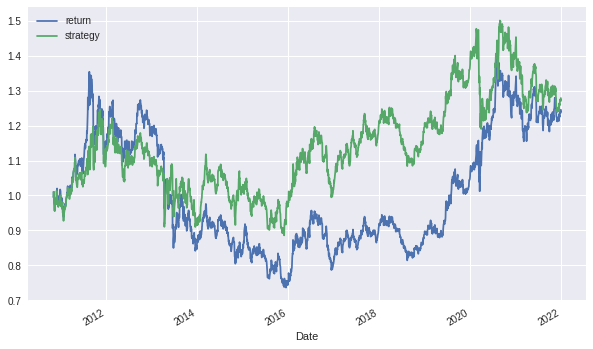

In [110]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize = (10,6))